In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [2]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [ ]:
df.drop(cols, axis = 1, inplace = True)

In [9]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [12]:
df['Vote_Average'] = pd.cut(
    df['Vote_Average'], 
    bins=[0, 5, 7, 10], 
    labels=['Average', 'Good', 'Excellent'],
    duplicates= 'drop',
    )
df['Vote_Average'].unique()

['Excellent', 'Good', 'Average', NaN]
Categories (3, object): ['Average' < 'Good' < 'Excellent']

In [14]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Excellent,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Good,Thriller
3,2021,Encanto,2402.201,5076,Excellent,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Good,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,Good,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,Good,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,Good,Thriller
8,2022,Fistful of Vengeance,1594.013,114,Good,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,Excellent,Science Fiction


In [16]:
df['Vote_Average'].value_counts(sort=False)

Vote_Average
Average       592
Good         6295
Excellent    2840
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True)

df.isna().sum() 

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [18]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Science Fiction
3,2022,The Batman,3827.658,1151,Excellent,Crime
4,2022,The Batman,3827.658,1151,Excellent,Mystery


In [19]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [20]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       3
Genre             19
dtype: int64

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Science Fiction
3,2022,The Batman,3827.658,1151,Excellent,Crime
4,2022,The Batman,3827.658,1151,Excellent,Mystery


# Data Visualization:

In [22]:
sns.set_style('whitegrid')

# What is the most frequent genre in our dataset ?

In [23]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

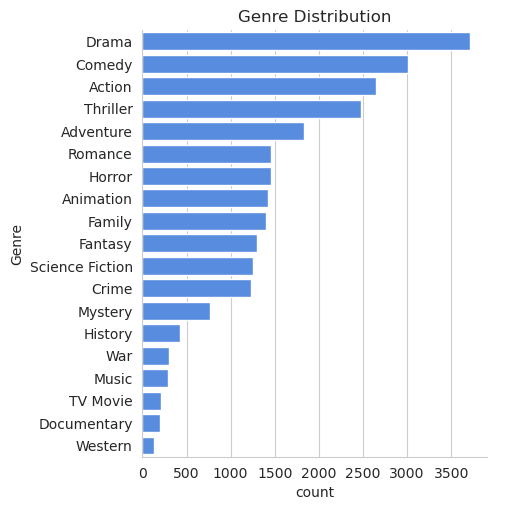

In [24]:
sns.catplot( y ='Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index,
            color = '#4287f5') 

plt.title('Genre Distribution')

plt.show()

 # which has highest votes in Vote_Avg column ?

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Science Fiction
3,2022,The Batman,3827.658,1151,Excellent,Crime
4,2022,The Batman,3827.658,1151,Excellent,Mystery


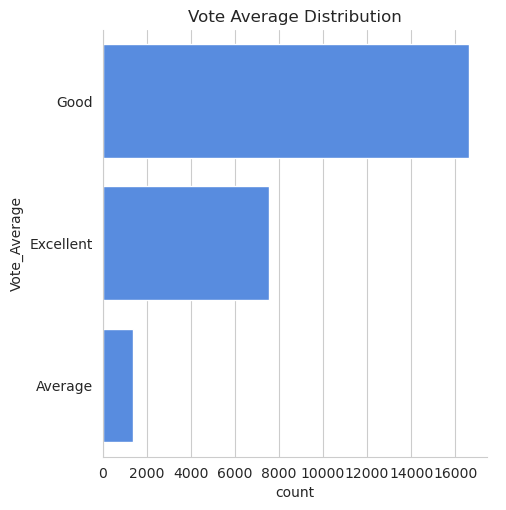

In [27]:
sns.catplot(y= 'Vote_Average', data = df, kind= 'count', order = df['Vote_Average'].value_counts().index,
            color='#4287f5')

plt.title('Vote Average Distribution')

plt.show()

# What  movie got the highest popularity ? what's its genre ?

In [28]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Adventure


In [30]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Excellent,Science Fiction


# what movie got the lowest popularity ? what's its genre ?

In [32]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Good,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Good,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Good,History
25549,1984,Threads,13.354,186,Excellent,War
25550,1984,Threads,13.354,186,Excellent,Drama
25551,1984,Threads,13.354,186,Excellent,Science Fiction


# Which year has the most fillmmed movies ?

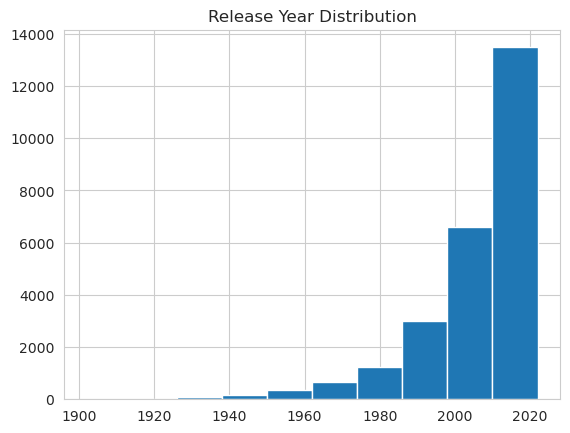

In [34]:
df['Release_Date'].hist()
plt.title('Release Year Distribution')

plt.show()

# Conlusion: 
Q1: What is the most frequent genre in the dataset ?
ans: Drama genre is the most frequent genre in our datasst.

Q2: which has highest votes in Vote_Average column ?
ans: In the Vote_Average column Drama is the highest in votes.

Q3: what movie got the highest popularity ? what's its genre ?
ans: Spider-Man movie got the highest popularity and its genres Action.

Q4: what movie got the lowest popularity ? what's its genre ?
ans: The united states, thread' kowest popularity in our dataset and its genres Music, Drama.

Q5: Which year has the most filmmed movies ?
ans: 2020 has the highest filmming rate in our dataset.